<a href="https://colab.research.google.com/github/alanagadelha/Python-Training/blob/master/Alana_T3_Interpola%C3%A7%C3%A3o_numerica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

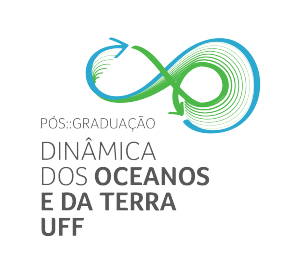

# **INTRODUÇÃO À GEOSTATÍSTICA**
## **DOCENTE: RODRIGO BIJANI**

##<center> **Exercício: Interpolação Numérica**

### Objetivo: Analisar o quão confiável pode ser um interpolador quando utilizado para confecção de mapas temáticos:
- Utilizando os interpoladores que trabalhamos em aula, execute as etapas seguintes para verificar os aspectos positivos e negativos de cada interpolador;
- Vamos gerar um banco de dados em grid;
- Calcular, aleatoriamente, alguns dados deste conjunto;
- Aplicar os interpoladores trabalhados e verificar quais tendências e artefatos foram criados;



## Biblioteca SciPy - (Scientific Computing Tools for Python)

> ### <br> "The SciPy library is one of the core packages that make up the SciPy stack. It provides many user-friendly and efficient numerical routines such as routines for numerical integration and optimization."<br>
>> Para mais detalhes, convido-os à visitar o site oficial e alguns sites complementares: <br>
LINK: https://docs.scipy.org/doc/scipy-1.1.0/reference/tutorial/index.html <br>
LINK: https://scipy-cookbook.readthedocs.io/ <br>

Etapa 01: Importar as bibliotecas que serão utilizadas:

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.interpolate as interpol
import random as rd
import pandas as pd

# Vamos usar algumas funções 2D como "dados reais". O domínio de cada função está estabelecido abaixo :

In [83]:
## funções para serem trabalhadas:
def Himmel(x, y):
    # dominio da funcao: (x,y) = [-5,5]
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

def Alpina(x, y):
    # dominio da funcao: (x,y) = [0,10]
    return -np.sqrt(x * y) * np.sin(x) * np.sin(y)

def Griewank(x, y):
    #dominio da funcao: (x,y) = [-100,100]
    return 1.0 + (1.0 / 400.0) * (x**2 + y**2) + np.cos(x) * np.cos(y / np.sqrt(2.0))

def Rosenbrock(x, y):
    # dominio da funcao: (x,y) = [-2,2]

    return 100.0 * (y - x**2)**2 + (1 - x)**2

def Rastrigin(x, y):
    #dominio da funcao: (x,y) = [-5,5]
    return 20.0 + x**2 + y**2 - 10.0 * (np.cos(2.0 * np.pi * x) + np.cos(2.0 * np.pi * y))

## Escolha duas das cinco funções para realizar a atividade. Siga as recomendações abaixo:

- Faça um grid, usando a função np.meshgrid(x,y); <br>
-  Em seguida, calcule o valor das funções escolhidas para cada um dos pontos do grid.

In [84]:
# escolha a sua funcao que servirá de "dado real":
# Para o nosso exercício vou escolher as duas últimas funções:

# =============================================================
# FUNÇÃO 1: Rosenbrock
# =============================================================

# escolha a sua funcao que servirá de "dado real":
def Rosenbrock(x, y):
    # dominio da funcao: (x,y) = [-2,2]
    return 100.0 * (y - x**2)**2 + (1 - x)**2

# numero de dados em x e em y:
nx = 200
ny = 200

# dominio da funcao escolhida:
xmin = -2.0
xmax =  2.0
ymin = -2.0
ymax =  2.0

# criando pontos regularmente espaçados nas direcoes x e y:
x = np.linspace(xmin, xmax, nx, endpoint=True)
y = np.linspace(ymin, ymax, ny, endpoint=True)

# criacao do mesh de pontos:
X, Y = np.meshgrid(x, y)

# funcao para calcular os "dados":
dado = Rosenbrock(X, Y)

# numero total de dados:
ndados = nx * ny

# guardar os dados em uma lista devidamente organizada:
dado_real = [np.reshape(X,(ndados)), np.reshape(Y,(ndados)), np.reshape(dado,(ndados))]

# Renomeando aqui as variáveis para não sobrescrever, pois vou plotar lado a lado:
X_rosen, Y_rosen, dado_rosen = X, Y, dado

# =============================================================
# FUNÇÃO 2: Rastrigin
# =============================================================

def Rastrigin(x, y):
    #dominio da funcao: (x,y) = [-5,5]
    return 20.0 + x**2 + y**2 - 10.0 * (np.cos(2.0 * np.pi * x) + np.cos(2.0 * np.pi * y))

# numero de dados em x e em y:
nx = 200
ny = 200

# dominio da funcao escolhida:
xmin = -5.0
xmax =  5.0
ymin = -5.0
ymax =  5.0

# criando pontos regularmente espaçados nas direcoes x e y:
x = np.linspace(xmin, xmax, nx, endpoint=True)
y = np.linspace(ymin, ymax, ny, endpoint=True)  # corrigido

# criacao do mesh de pontos:
X, Y = np.meshgrid(x, y)

# funcao para calcular os "dados":
dado = Rastrigin(X, Y)

# numero total de dados:
ndados = nx * ny

# guardar os dados em uma lista devidamente organizada:
dado_real = [np.reshape(X,(ndados)), np.reshape(Y,(ndados)), np.reshape(dado,(ndados))]

#Visualizando os dados gerados!!!
(len(dado_real), [a.shape for a in dado_real], float(dado_real[2].min()), float(dado_real[2].max()))

# Renomeando aqui as variáveis para não sobrescrever, pois vou plotar lado a lado:
X_rastr, Y_rastr, dado_rastr = X, Y, dado



# Grafico de contorno do banco de dados:

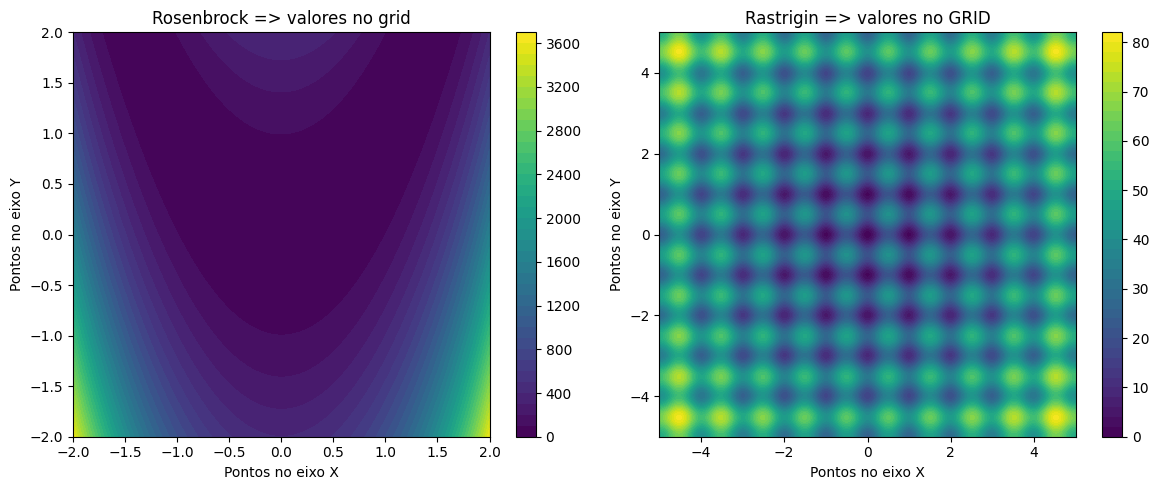

In [85]:
# =============================================================
# Visualização lado a lado — Rosenbrock e Rastrigin
# =============================================================
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico de Rosenbrock
cs1 = axes[0].contourf(X_rosen, Y_rosen, dado_rosen, levels=40)
axes[0].set_title("Rosenbrock => valores no grid")
axes[0].set_xlabel("Pontos no eixo X")
axes[0].set_ylabel("Pontos no eixo Y")
fig.colorbar(cs1, ax=axes[0])

# Gráfico de Rastrigin
cs2 = axes[1].contourf(X_rastr, Y_rastr, dado_rastr, levels=40)
axes[1].set_title("Rastrigin => valores no GRID")
axes[1].set_xlabel("Pontos no eixo X")
axes[1].set_ylabel("Pontos no eixo Y")
fig.colorbar(cs2, ax=axes[1])

plt.tight_layout()
plt.show()


# Etapa do Boostrapping ou reamostragem:

# COMENTÁRIO ALANA======= Explicação:
O único bloco que muda para aplicar a Técnica de reamostragem é

Para a função de Rosenbrock:
```
V.append(dado_rosen[indy, indx])  # valor da propriedade
Xv.append(Xrosen[indy, indx])     # coordenada X
Yv.append(Yrosen[indy, indx])     # coordenada Y
```

Para a função de Rastrigin:
```
V.append(dado_rastr[indy, indx])
Xv.append(X_rastr[indy, indx])
Yv.append(Y_rastr[indy, indx])
```




Amostras bootstrap (df)          Xv        Yv         Dado
0 -1.839196 -1.517588  2409.286235
1 -0.653266  0.070352    15.435752
2 -0.251256 -0.412060    24.146198
3  1.537688  0.773869   253.295162
4 -0.110553  1.618090   259.114704
5 -0.030151 -0.934673    88.592660
6 -0.673367 -1.718593   474.565445
7 -1.316583 -1.517588  1062.252684
8  0.874372  0.150754    37.687436
9 -0.793970 -0.834171   217.711627


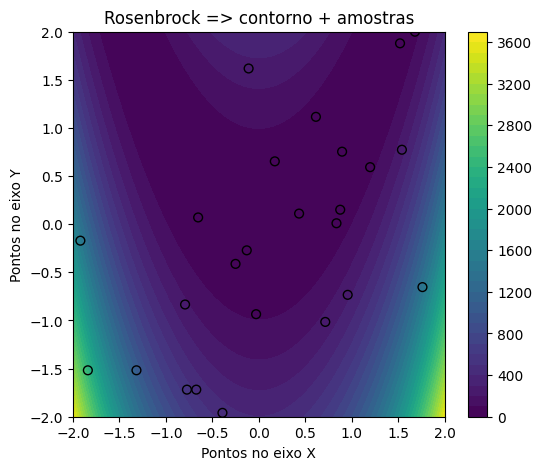

In [86]:
# Aplicando o bootstrapping!
# === Bootstrapping / Reamostragem na Função Rosenbrock
semente = 100
np.random.seed(semente)

amostragem = 25

indx = []
indy = []
for i in range(amostragem):
    indx.append(np.random.randint(0, nx))
    indy.append(np.random.randint(0, ny))

V = []
Xv = []
Yv = []

V.append(dado_rosen[indy, indx])
Xv.append(X_rosen[indy, indx])
Yv.append(Y_rosen[indy, indx])

V_rosen_ori  = np.array(V)
Xv_rosen_ori = np.array(Xv)
Yv_rosen_ori = np.array(Yv)

V_rosen_reshape = np.reshape(V, (amostragem))
Xv_rosen_reshape = np.reshape(Xv, (amostragem))
Yv_rosen_reshape = np.reshape(Yv, (amostragem))

dic = {'Xv': Xv_rosen_reshape,'Yv': Yv_rosen_reshape,'Dado': V_rosen_reshape}
df_rosen = pd.DataFrame(dic)

# Mostrar tabela e plot
print("Amostras bootstrap (df)", df_rosen.head(10))

plt.figure(figsize=(6,5))
cs = plt.contourf(X_rosen, Y_rosen, dado_rosen, levels=40)
plt.scatter(Xv_rosen_reshape, Yv_rosen_reshape, s=40, edgecolor='k', facecolor='none')
plt.title("Rosenbrock => contorno + amostras")
plt.xlabel("Pontos no eixo X")
plt.ylabel("Pontos no eixo Y")
plt.colorbar(cs)
plt.show()

Amostras bootstrap (df)          Xv        Yv       Dado
0 -4.597990 -3.793970  60.971779
1 -1.633166  0.175879  24.906684
2 -0.628141 -1.030151  18.564840
3  3.844221  1.934673  23.771331
4 -0.276382  4.045226  28.491322
5 -0.075377 -2.336683  21.747652
6 -1.683417 -4.296482  48.235446
7 -3.291457 -3.793970  45.075682
8  2.185930  0.376884  28.156819
9 -1.984925 -2.085427   9.740031


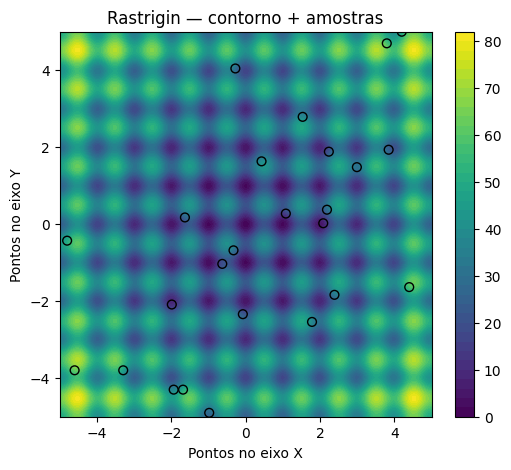

In [87]:
# Aplicando o bootstrapping no mesmo estilo.
# === Bootstrapping / Reamostragem na Função Rastrigin
semente = 100
np.random.seed(semente)

amostragem = 25

indx = []
indy = []
for i in range(amostragem):
    indx.append(np.random.randint(0, nx))
    indy.append(np.random.randint(0, ny))

V = []
Xv = []
Yv = []

V.append(dado_rastr[indy, indx])
Xv.append(X_rastr[indy, indx])
Yv.append(Y_rastr[indy, indx])

V_rastr_ori  = np.array(V)
Xv_rastr_ori = np.array(Xv)
Yv_rastr_ori = np.array(Yv)

V_rastr_reshape  = np.reshape(V, (amostragem))
Xv_rastr_reshape = np.reshape(Xv, (amostragem))
Yv_rastr_reshape = np.reshape(Yv, (amostragem))

dic = {'Xv': Xv_rastr_reshape,'Yv': Yv_rastr_reshape,'Dado': V_rastr_reshape}
df_rastr = pd.DataFrame(dic)

# Mostrar tabela e plot
print("Amostras bootstrap (df)", df_rastr.head(10))

plt.figure(figsize=(6,5))
cs = plt.contourf(X_rastr, Y_rastr, dado_rastr, levels=40)
plt.scatter(Xv_rastr_reshape, Yv_rastr_reshape, s=40, edgecolor='k', facecolor='none')
plt.title("Rastrigin — contorno + amostras")
plt.xlabel("Pontos no eixo X")
plt.ylabel("Pontos no eixo Y")
plt.colorbar(cs)
plt.show()

## Grafico para verificar a nova amostragem:

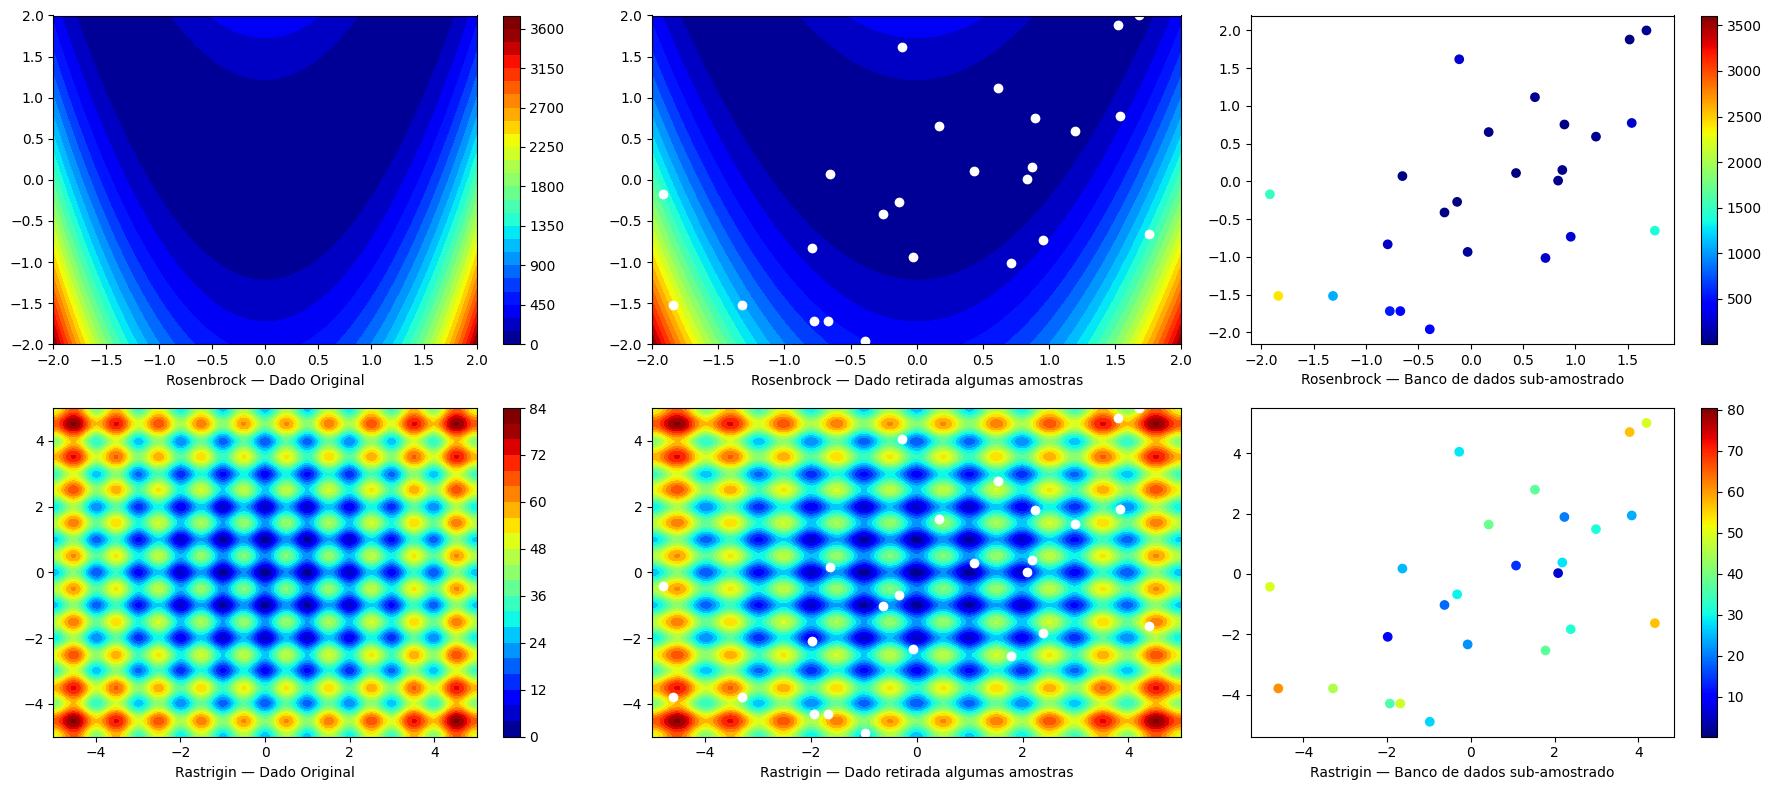

In [88]:
plt.figure(figsize=(18, 8))

# ---------- ROSENBROCK ----------
df_rosen.drop_duplicates(inplace=True)

vmin_r = np.min(dado_rosen); vmax_r = np.max(dado_rosen)
plt.subplot(231)
plt.contourf(X_rosen, Y_rosen, dado_rosen, 25, cmap='jet', vmin=vmin_r, vmax=vmax_r)
plt.colorbar()
plt.xlabel('Rosenbrock — Dado Original')

plt.subplot(232)
plt.contourf(X_rosen, Y_rosen, dado_rosen, 25, cmap='jet', vmin=vmin_r, vmax=vmax_r)
plt.scatter(df_rosen.Xv, df_rosen.Yv, c='white')
plt.xlabel('Rosenbrock — Dado retirada algumas amostras')

plt.subplot(233)
plt.scatter(df_rosen.Xv, df_rosen.Yv, c=df_rosen.Dado, cmap='jet', vmin=vmin_r, vmax=vmax_r)
plt.colorbar()
plt.xlabel('Rosenbrock — Banco de dados sub-amostrado')

# ---------- RASTRIGIN ----------
df_rastr.drop_duplicates(inplace=True)

vmin_t = np.min(dado_rastr); vmax_t = np.max(dado_rastr)
plt.subplot(234)
plt.contourf(X_rastr, Y_rastr, dado_rastr, 25, cmap='jet', vmin=vmin_t, vmax=vmax_t)
plt.colorbar()
plt.xlabel('Rastrigin — Dado Original')

plt.subplot(235)
plt.contourf(X_rastr, Y_rastr, dado_rastr, 25, cmap='jet', vmin=vmin_t, vmax=vmax_t)
plt.scatter(df_rastr.Xv, df_rastr.Yv, c='white')
plt.xlabel('Rastrigin — Dado retirada algumas amostras')

plt.subplot(236)
plt.scatter(df_rastr.Xv, df_rastr.Yv, c=df_rastr.Dado, cmap='jet', vmin=vmin_t, vmax=vmax_t)
plt.colorbar()
plt.xlabel('Rastrigin — Banco de dados sub-amostrado')

plt.tight_layout()
plt.show()

# Fim da criação dos dados reais!

### Agora vamos usar as técnicas de interpolação para verificar qual delas recupera melhor os dados originais:

# COMENTÁRIO ALANA=======Utilize as funções de interpolação de Base Radial (RBF) e a Inverso da Potência da Distância (IDW):


In [89]:
def rbf_gaussian_interpolate(xs, ys, zs, xi, yi, epsilon=None, ridge=1e-10, batch=20000):
    xs = np.asarray(xs).ravel(); ys = np.asarray(ys).ravel(); zs = np.asarray(zs).ravel()
    xi = np.asarray(xi).ravel(); yi = np.asarray(yi).ravel()
    m = xs.size; n = xi.size
    DX = xs[:, None] - xs[None, :]
    DY = ys[:, None] - ys[None, :]
    D  = np.sqrt(DX*DX + DY*DY)
    if epsilon is None:
        d_nonzero = D[D > 0]
        epsilon = 1.0 if d_nonzero.size == 0 else 1.0 / (np.median(d_nonzero) + 1e-12)
    K = np.exp(-(epsilon * D)**2)
    K.flat[::m+1] += ridge
    w = np.linalg.solve(K, zs)
    zi = np.empty(n, dtype=float)
    start = 0
    while start < n:
        end = min(start + batch, n)
        DXq = xi[start:end][None, :] - xs[:, None]
        DYq = yi[start:end][None, :] - ys[:, None]
        Dq  = np.sqrt(DXq*DXq + DYq*DYq)
        Phi = np.exp(-(epsilon * Dq)**2)
        zi[start:end] = np.dot(w, Phi)
        start = end
    return zi


def inv_power_dist_2D(x,y,data,xi,yi,power):

    ''' entradas:
    x,y,data = 1D arrays com as coordenadas e o dado em cada posicao;
    power = real scalar para a potencia a ser utilizada na interpolacao;
    xi,yi = 1D arrays com as coordenadas onde se deseja interpolar;

    saida:
    dati = dado interpolado  '''

    # verificando qual o menor dos vetores de entrada:
    n1 = np.size(x)  # dimension of real data
    n2 = np.size(xi) # dimension of interpolated data
    # criacao de arrays:
    peso = np.zeros(n2)
    dati = np.zeros(n2)
    dist = np.zeros( (n2,n1) )
    dummy = 1e-15
    for i in range(n2):
        dist[i,:] = np.sqrt( (x[:] - xi[i] )**2 + ( y[:] - yi[i] )**2 ) # calculo das distancias
        for j in range(n1):
            if dist[i,j] == 0.:
                dist[i,j] = dummy

        peso[i] = np.sum(1.0 / dist[i,:]**power)
        dati[i] = np.sum(data/dist[i,:]**power)
        dati[i] = dati[i]/peso[i]

    return dati

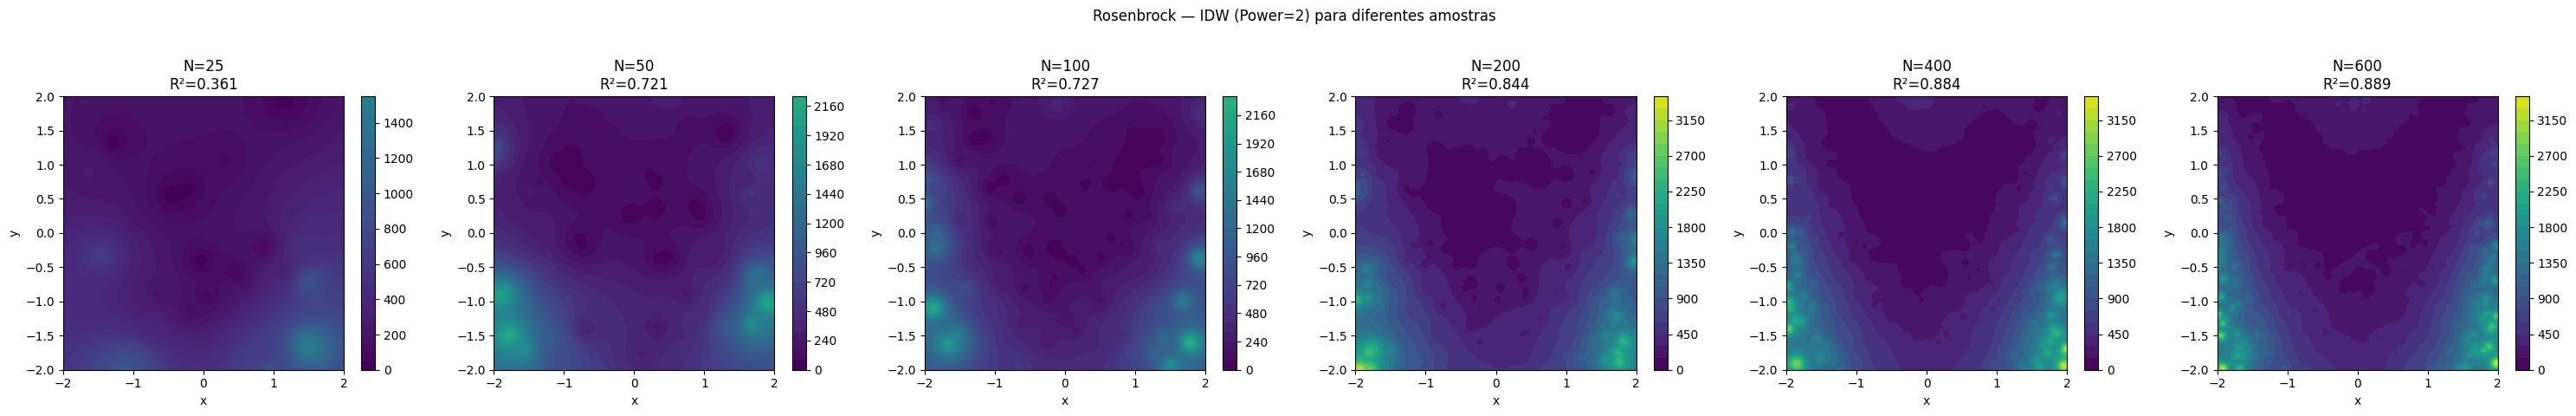

In [90]:
semente = 100
amostras_list = [25, 50, 100, 200, 400, 600]

def _metrics(y_true, y_pred):
    y_true = y_true.ravel(); y_pred = y_pred.ravel()
    ss_res = np.sum((y_true - y_pred)**2)
    ss_tot = np.sum((y_true - np.mean(y_true))**2)
    r2 = 1.0 - ss_res/(ss_tot + 1e-15)
    return r2

# Guardar métricas
resultados_idw_p2 = []   # (Func, Metodo, N, R2)

def _executa_blocos_para_func(nome, X_grid, Y_grid, Z_grid):
    ny, nx = X_grid.shape
    xi, yi = X_grid.ravel(), Y_grid.ravel()
    vmin, vmax = float(Z_grid.min()), float(Z_grid.max())

    fig, axes = plt.subplots(1, len(amostras_list), figsize=(5*len(amostras_list), 5))
    fig.suptitle(f"{nome} — IDW (Power=2) para diferentes amostras", y=0.95)

    for j, N in enumerate(amostras_list):
        rng = np.random.default_rng(semente + N)

        # Amostragem
        indx = rng.integers(0, nx, size=N)
        indy = rng.integers(0, ny, size=N)

        V  = Z_grid[indy, indx].reshape(N)
        Xv = X_grid[indy, indx].reshape(N)
        Yv = Y_grid[indy, indx].reshape(N)

        # Interpolação IDW p=2
        zi_idw = inv_power_dist_2D(Xv, Yv, V, xi, yi, power=2.0).reshape(Y_grid.shape)
        r2 = _metrics(Z_grid, zi_idw)
        resultados_idw_p2.append((nome, "IDW(p=2)", N, r2))

        ax = axes[j]
        cs = ax.contourf(X_grid, Y_grid, zi_idw, 30, vmin=vmin, vmax=vmax)
        ax.set_title(f"N={N}\nR²={r2:.3f}")
        ax.set_xlabel("x")
        ax.set_ylabel("y")
        fig.colorbar(cs, ax=ax)

    plt.tight_layout(rect=[0, 0, 1, 0.93])
    plt.show()

# -------- (ROSENBROCK IDW) --------
_executa_blocos_para_func("Rosenbrock", X_rosen, Y_rosen, dado_rosen)


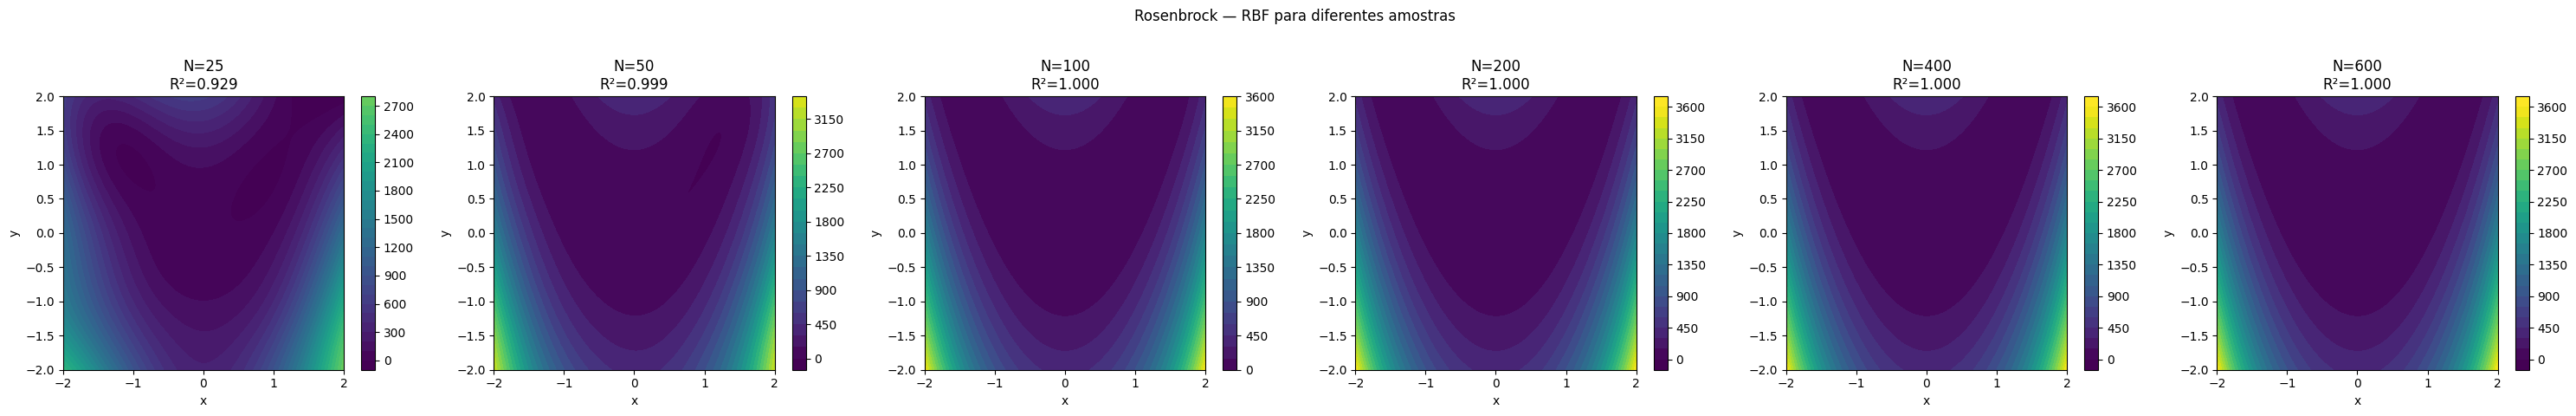

In [91]:
semente = 100
amostras_list = [25, 50, 100, 200, 400, 600]

def _metrics(y_true, y_pred):
    y_true = y_true.ravel(); y_pred = y_pred.ravel()
    ss_res = np.sum((y_true - y_pred)**2)
    ss_tot = np.sum((y_true - np.mean(y_true))**2)
    r2 = 1.0 - ss_res/(ss_tot + 1e-15)
    return r2

# Guardar métricas
resultados_rbf = [] # (Func, Metodo, N, R2)

def _executa_blocos_para_func(nome, X_grid, Y_grid, Z_grid):
    ny, nx = X_grid.shape
    xi, yi = X_grid.ravel(), Y_grid.ravel()
    vmin, vmax = float(Z_grid.min()), float(Z_grid.max())

    fig, axes = plt.subplots(1, len(amostras_list), figsize=(5*len(amostras_list), 5))
    fig.suptitle(f"{nome} — RBF para diferentes amostras", y=0.95)

    for j, N in enumerate(amostras_list):
        rng = np.random.default_rng(semente + N)

        # Amostragem
        indx = rng.integers(0, nx, size=N)
        indy = rng.integers(0, ny, size=N)

        V  = Z_grid[indy, indx].reshape(N)
        Xv = X_grid[indy, indx].reshape(N)
        Yv = Y_grid[indy, indx].reshape(N)

        # Interpolação RBF
        zi_rbf = rbf_gaussian_interpolate(
            Xv, Yv, V,
            xi, yi,
            epsilon=None,
            ridge=1e-10
        ).reshape(Y_grid.shape)

        r2 = _metrics(Z_grid, zi_rbf)
        resultados_rbf.append((nome, "RBF", N, r2))

        ax = axes[j]
        cs = ax.contourf(X_grid, Y_grid, zi_rbf, 30, vmin=vmin, vmax=vmax)
        ax.set_title(f"N={N}\nR²={r2:.3f}")
        ax.set_xlabel("x")
        ax.set_ylabel("y")
        fig.colorbar(cs, ax=ax)

    plt.tight_layout(rect=[0, 0, 1, 0.93])
    plt.show()

# -------- (ROSENBROCK RBF) --------
_executa_blocos_para_func("Rosenbrock", X_rosen, Y_rosen, dado_rosen)


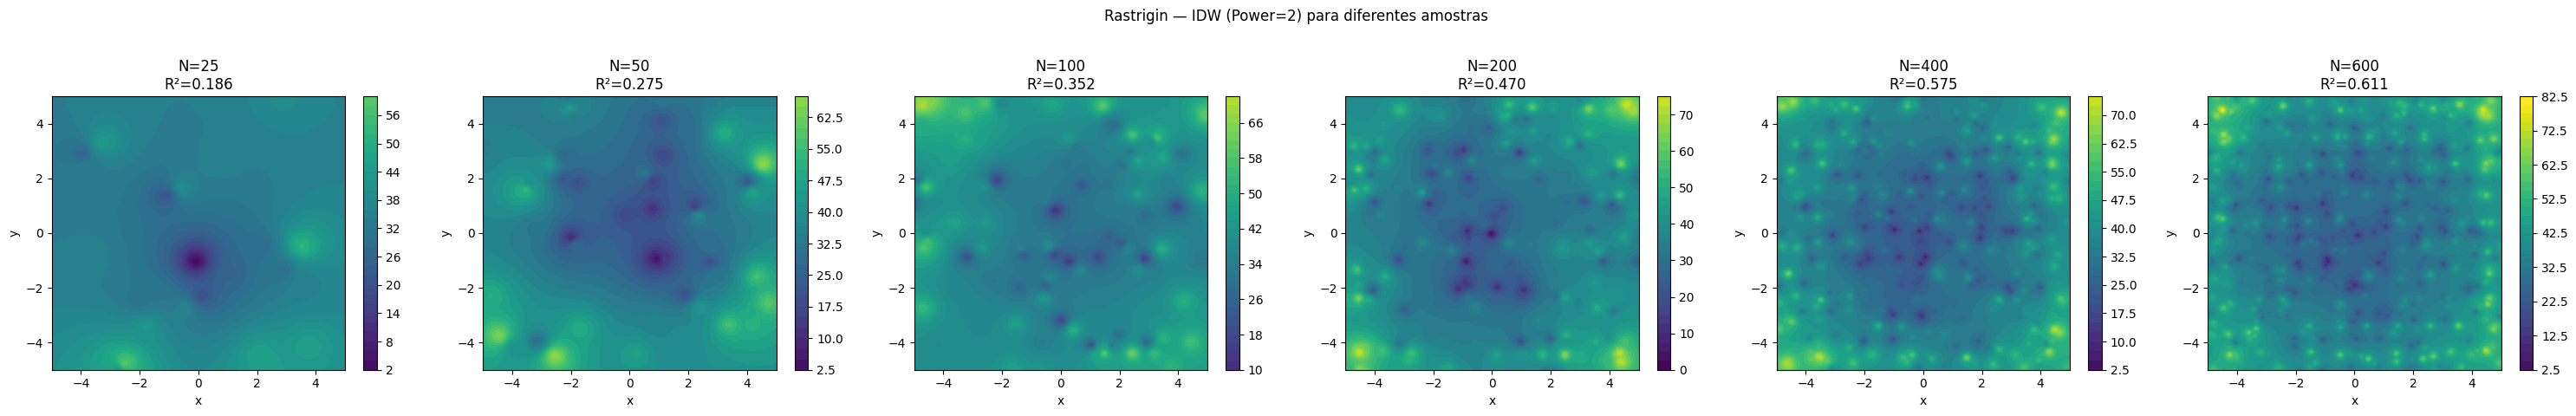

In [92]:
semente = 100
amostras_list = [25, 50, 100, 200, 400, 600]

def _metrics(y_true, y_pred):
    y_true = y_true.ravel(); y_pred = y_pred.ravel()
    ss_res = np.sum((y_true - y_pred)**2)
    ss_tot = np.sum((y_true - np.mean(y_true))**2)
    r2 = 1.0 - ss_res/(ss_tot + 1e-15)
    return r2

# Guardar métricas Rastrigin com IDW(p=2)
resultados_idw_p2_rastr = []  # (Func, Metodo, N, R2)

def _executa_blocos_para_func_rastr(nome, X_grid, Y_grid, Z_grid):
    ny, nx = X_grid.shape
    xi, yi = X_grid.ravel(), Y_grid.ravel()
    vmin, vmax = float(Z_grid.min()), float(Z_grid.max())

    # Figura 1 x 6 (uma coluna por N)
    fig, axes = plt.subplots(1, len(amostras_list), figsize=(5*len(amostras_list), 5))
    fig.suptitle(f"{nome} — IDW (Power=2) para diferentes amostras", y=0.95)

    for j, N in enumerate(amostras_list):
        rng = np.random.default_rng(semente + N)

        # Amostragem
        indx = rng.integers(0, nx, size=N)
        indy = rng.integers(0, ny, size=N)

        V  = Z_grid[indy, indx].reshape(N)
        Xv = X_grid[indy, indx].reshape(N)
        Yv = Y_grid[indy, indx].reshape(N)

        # Interpolação IDW p=2
        zi_idw = inv_power_dist_2D(
            Xv, Yv, V,
            xi, yi,
            power=2.0
        ).reshape(Y_grid.shape)

        r2 = _metrics(Z_grid, zi_idw)
        resultados_idw_p2_rastr.append((nome, "IDW(p=2)", N, r2))

        ax = axes[j]
        cs = ax.contourf(X_grid, Y_grid, zi_idw, 30, vmin=vmin, vmax=vmax)
        ax.set_title(f"N={N}\nR²={r2:.3f}")
        ax.set_xlabel("x")
        ax.set_ylabel("y")
        fig.colorbar(cs, ax=ax)

    plt.tight_layout(rect=[0, 0, 1, 0.93])
    plt.show()

# -------- (RASTRIGIN IDW) --------
_executa_blocos_para_func_rastr("Rastrigin", X_rastr, Y_rastr, dado_rastr)


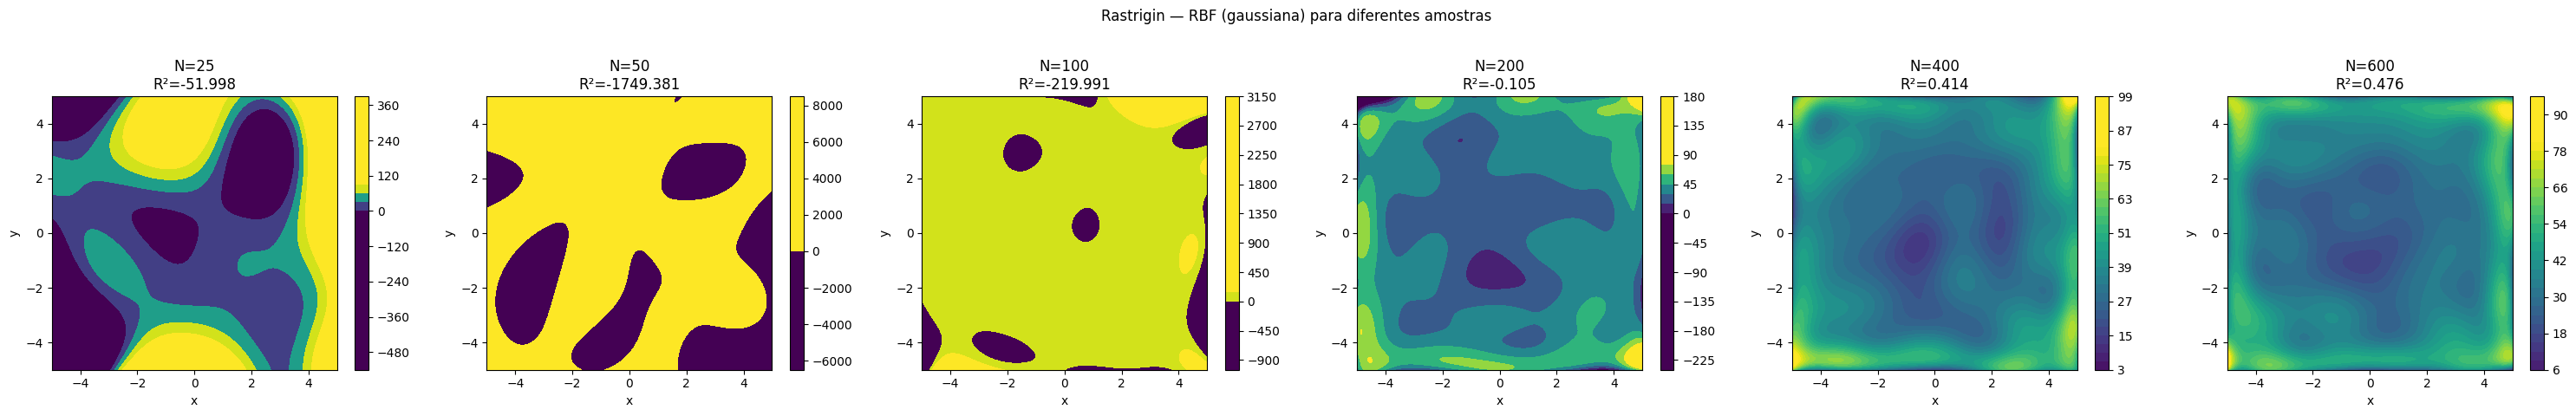

In [93]:
import numpy as np
import matplotlib.pyplot as plt

semente = 100
amostras_list = [25, 50, 100, 200, 400, 600]

def _metrics(y_true, y_pred):
    y_true = y_true.ravel(); y_pred = y_pred.ravel()
    ss_res = np.sum((y_true - y_pred)**2)
    ss_tot = np.sum((y_true - np.mean(y_true))**2)
    r2 = 1.0 - ss_res/(ss_tot + 1e-15)
    return r2

# Guardar métricas da Rastrigin com RBF
resultados_rbf_rastr = []   # (Func, Metodo, N, R2)

def _executa_blocos_para_func_rbf_rastr(nome, X_grid, Y_grid, Z_grid):
    ny, nx = X_grid.shape
    xi, yi = X_grid.ravel(), Y_grid.ravel()
    vmin, vmax = float(Z_grid.min()), float(Z_grid.max())

    # Figura 1 x 6 (uma coluna para cada N)
    fig, axes = plt.subplots(1, len(amostras_list), figsize=(5*len(amostras_list), 5))
    fig.suptitle(f"{nome} — RBF (gaussiana) para diferentes amostras", y=0.95)

    for j, N in enumerate(amostras_list):
        rng = np.random.default_rng(semente + N)

        # Amostragem
        indx = rng.integers(0, nx, size=N)
        indy = rng.integers(0, ny, size=N)

        V  = Z_grid[indy, indx].reshape(N)
        Xv = X_grid[indy, indx].reshape(N)
        Yv = Y_grid[indy, indx].reshape(N)

        # Interpolação RBF (gaussiana)
        zi_rbf = rbf_gaussian_interpolate(
            Xv, Yv, V,
            xi, yi,
            epsilon=None,
            ridge=1e-10
        ).reshape(Y_grid.shape)

        r2 = _metrics(Z_grid, zi_rbf)
        resultados_rbf_rastr.append((nome, "RBF(gauss)", N, r2))

        ax = axes[j]
        cs = ax.contourf(X_grid, Y_grid, zi_rbf, 30, vmin=vmin, vmax=vmax)
        ax.set_title(f"N={N}\nR²={r2:.3f}")
        ax.set_xlabel("x")
        ax.set_ylabel("y")
        fig.colorbar(cs, ax=ax)

    plt.tight_layout(rect=[0, 0, 1, 0.93])
    plt.show()

# -------- (RASTRIGIN RBF) --------
_executa_blocos_para_func_rbf_rastr("Rastrigin", X_rastr, Y_rastr, dado_rastr)


# Faça análises comparativas para mostrar a quantidade de dados considerada "adequada" para que o interpolador tenha sido bem utilizado.

# COMENTÁRIO ALANA=======Comportamento da Função Rosenbrock para IDW (`Inverse Distance Weightinge`) e RBF (Funções de Base Radial do tipo Gaussiana).

(GRÁFICO ABAIXO)

Análise:
Os testes foram feitos com 6 amostras de tamanhos variados [25, 50, 100, 200, 400, 600].

1.  A RBF é extremamente eficiente para funções suaves como a Rosenbrock. Com poucas amostras ≥ 25 já obtemos R2~1.0, já reconstroi a série com alta fidelidade.

2.  Já a IDW indica que IDW(p=2) apenas com amostras ≥ 400 obtemos um R2 ~0.89, ou seja requer muitos pontos, de forma que não captura a curvatura de forma precisa.

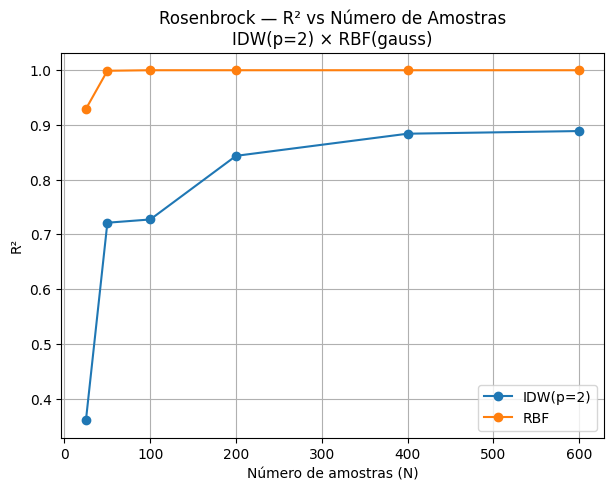

,Xv,Yv,Dado
0,-4.597990,-3.793970,60.971779
1,-1.633166,0.175879,24.906684
2,-0.628141,-1.030151,18.564840
3,3.844221,1.934673,23.771331
4,-0.276382,4.045226,28.491322
5,-0.075377,-2.336683,21.747652
6,-1.683417,-4.296482,48.235446
7,-3.291457,-3.793970,45.075682
8,2.185930,0.376884,28.156819
9,-1.984925,-2.085427,9.740031


In [94]:
# Junta os resultados de IDW e RBF para ROSENBROCK
rows = []
rows += resultados_idw_p2 # IDW(p=2)
rows += resultados_rbf    # RBF

# Criar DataFrame
df = pd.DataFrame(rows, columns=["Func", "Metodo", "N", "R2"])

# Ordenar por N e método
df = df.sort_values(["Metodo", "N"])

plt.figure(figsize=(7,5))

for metodo in df["Metodo"].unique():
    sub = df[df["Metodo"] == metodo]
    plt.plot(sub["N"], sub["R2"], marker="o", label=metodo)

plt.title("Rosenbrock — R² vs Número de Amostras\nIDW(p=2) × RBF(gauss)")
plt.xlabel("Número de amostras (N)")
plt.ylabel("R²")
plt.grid(True)
plt.legend()
plt.show()

display(df_rastr)

# COMENTÁRIO ALANA=======Comportamento da Função Rastringin para IDW (`Inverse Distance Weightinge`) e RBF (Funções de Base Radial do tipo Gaussiana).

Análise:
Os testes foram feitos com as mesmas 6 amostras de tamanhos variados [25, 50, 100, 200, 400, 600]. **O problema é mais difícil para ambos os interpoladores.**

1.  A RBF é melhor que o IDW na Rastrigin, mas ainda insuficiente para capturar corretamente oscilações rápidas com poucas amostras. Com a RBF ≥ 400 obtemos R2~0.38, o que é pouco!

2.  Já a IDW precisa de muitas amostras (N ≥ 400) para aproximar o formato do vale. Mesmo com N = 400 ou 600 amostras, o IDW alcançou valores de R² em torno de 0.50, mostrando que o método apresenta ainda muitas limitações para reconstruir a série de pontos.

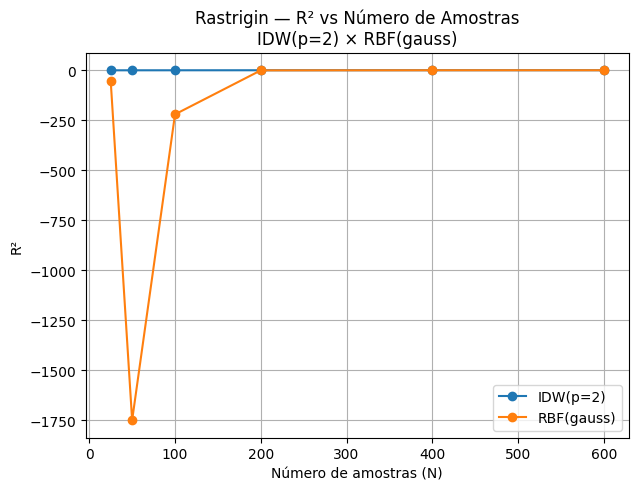

,Func,Metodo,N,R2
0,Rastrigin,IDW(p=2),25,0.186334
1,Rastrigin,IDW(p=2),50,0.275495
2,Rastrigin,IDW(p=2),100,0.351862
3,Rastrigin,IDW(p=2),200,0.470453
4,Rastrigin,IDW(p=2),400,0.574575
5,Rastrigin,IDW(p=2),600,0.611420
6,Rastrigin,RBF(gauss),25,-51.997543
7,Rastrigin,RBF(gauss),50,-1749.380838
8,Rastrigin,RBF(gauss),100,-219.990844
9,Rastrigin,RBF(gauss),200,-0.105347


In [95]:
# Junta os resultados de IDW e RBF para a Rastrigin
rows = []

# Listas geradas anteriormente
rows += resultados_idw_p2_rastr  # (Func, "IDW(p=2)", N, R2)
rows += resultados_rbf_rastr     # (Func, "RBF(gauss)", N, R2)

# DataFrame
df = pd.DataFrame(rows, columns=["Func", "Metodo", "N", "R2"])

# Ordena por N para cada método
df_rastr = df.sort_values(["Metodo", "N"])

plt.figure(figsize=(7,5))

for metodo in df_rastr["Metodo"].unique():
    sub = df_rastr[df_rastr["Metodo"] == metodo]
    plt.plot(sub["N"], sub["R2"], marker="o", label=metodo)

plt.title("Rastrigin — R² vs Número de Amostras\nIDW(p=2) × RBF(gauss)")
plt.xlabel("Número de amostras (N)")
plt.ylabel("R²")
plt.grid(True)
plt.legend()
plt.show()

display(df_rastr)
